**1.1.1 Пример**
Проведем прямую y = mx + b через экспериментальные точки.

0.9999999999999999 -0.9499999999999997


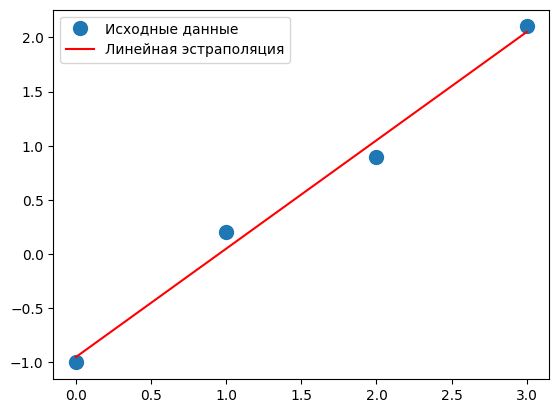

In [1]:
import numpy as np
import matplotlib.pyplot as plt


x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
A

m,c =np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)

plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная эстраполяция')
plt.legend()
plt.show()


**1.1.2 Пример**
Пусть x, y – вектора длиной n > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты поринома a, b, c по методу
наименьших квадратов. Данные мтогут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла.

[-4.94772802 -3.52067448 -2.68284949 -1.74769651 -0.59928957 -0.34238649
  1.23430592  1.73140231  3.13103689  4.07602025  5.03068193]
[-4.94772802 -3.52067448 -2.68284949 -1.74769651 -0.59928957 -0.34238649
  1.23430592  1.73140231  3.13103689  4.07602025  5.03068193]


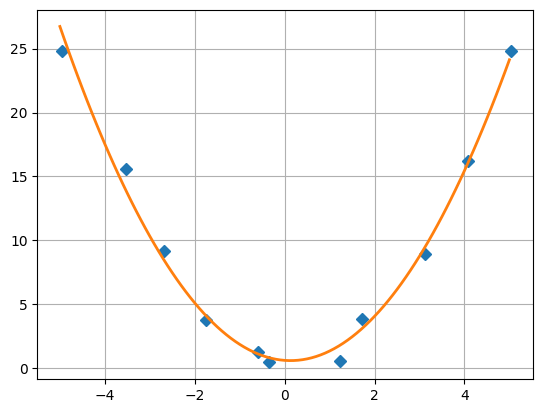

In [4]:
from numpy import *
from numpy.random import *


delta = 1.0
x = linspace(-5, 5, 11)
y = x**2 + delta * (rand(11) - 0.5)
x += delta*(rand(11) - 0.5)

x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')


x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(x)

m = vstack((x ** 2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-5, 5, 101)

plt.plot(x, y, 'D')

plt.plot(x_prec, s[0] * x_prec** 2 + s[1] * x_prec+s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')


**1.1.3 Пример**
По данным предыдущего примера постройте эстраполяционного полинома
третьего порядка

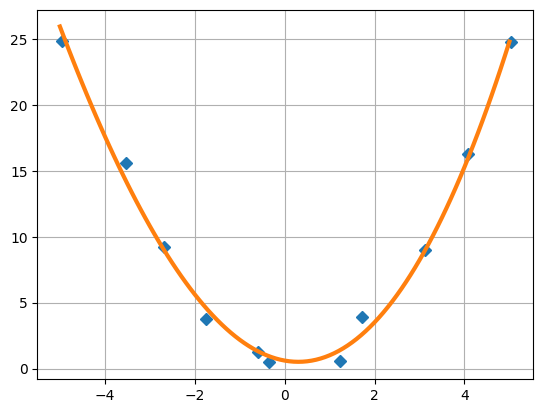

In [7]:
import numpy as np


m = vstack((x ** 3, x ** 2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-5, 5, 101)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')


**Задание**
Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.

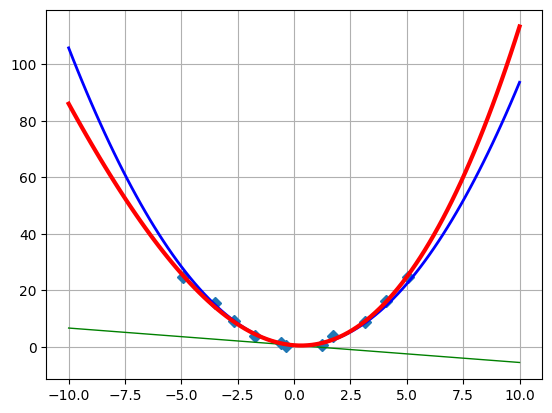

In [16]:
from numpy import *
from numpy.random import *

m = vstack((x ** 3, x ** 2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-10, 10, 101)

plt.plot(x, y, 'D')

plt.plot(x_prec, s[2] * x_prec+s[3], 'g', lw=1)
plt.plot(x_prec, s[1] * x_prec** 2 + s[2] * x_prec+s[3], 'b', lw=2)
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3], 'r', lw=3)
plt.grid()


**1.1.4 Пример**
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривую вида f(x, b) = b0 + b1exp(−b2x
2
)

0.00024553899384309864
0.1305454675227177


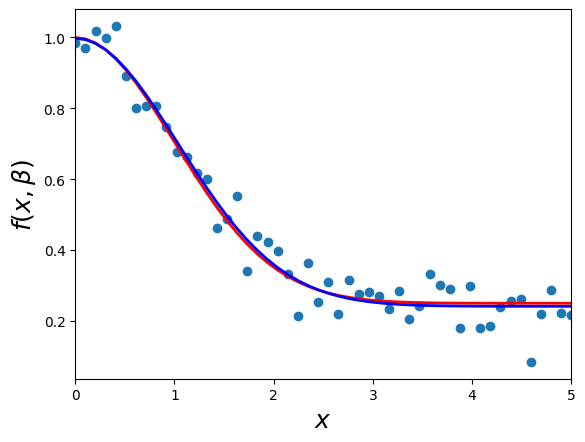

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[0.98576212 0.97147061 1.01880534 0.99736514 1.032651   0.89180996
 0.80080145 0.80709939 0.80562522 0.74692059 0.67622653 0.66275769
 0.6173709  0.59961732 0.4615694  0.4873666  0.5522707  0.34185901
 0.44095696 0.42428146 0.39814318 0.33157299 0.21326258 0.36438924
 0.2537849  0.31026288 0.21935806 0.31554273 0.27510763 0.2823415
 0.26911223 0.23503011 0.2833084  0.20612326 0.24269058 0.33233755
 0.30137884 0.29003553 0.18155305 0.298

In [21]:
from scipy.optimize import curve_fit
import scipy as sp

beta = (0.25, 0.75, 0.5)
def f(x: float, b0: float, b1: float, b2: float) -> float:
    return b0 + b1 * np.exp(-b2 * x ** 2)

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

print(xdata)
print(ydata)



**1.1.5 Пример**
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:
    1) f(x, b) = b0 + b1x
    2) f(x, b) = b0 + b1x + b2x^2
    3) f(x, b) = b0 + b1ln(x)
    4) f(x, b) = b0 x^b1

[0.2500334  0.74825655]
0.00020063789194483194
0.1764229736630995


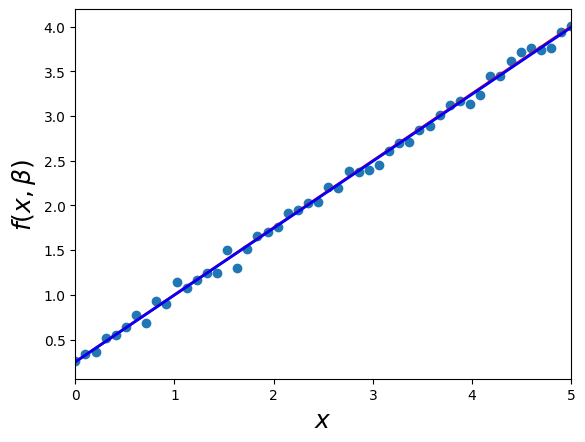

[1.00618414 1.99983494]
4.388375180921659e-05
0.10147860004755013
0.10147860004755013


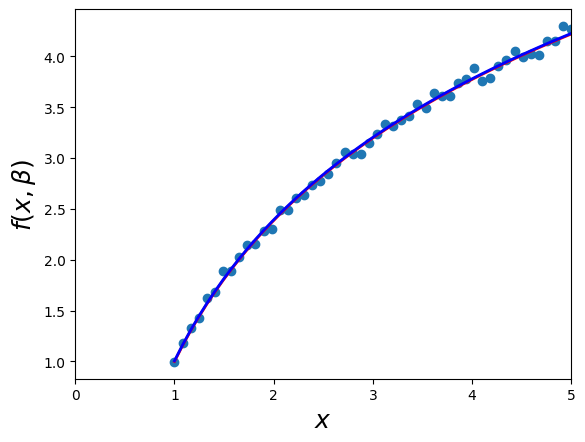

[0.99557031 2.00380938]
5.142463099948264e-06
0.12448397391439198


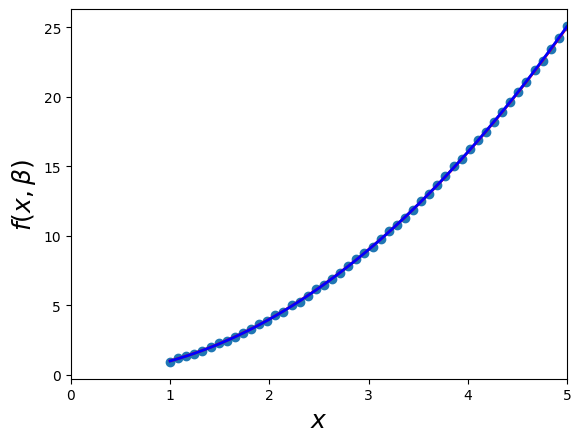

In [4]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

beta = (0.25, 0.75)
def f(x: float, b0: float, b1: float) -> float:
    return b0 + b1 * x

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)

print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig,ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

beta = (1, 2)
def f(x: float, b0: float, b1: float) -> float:
    return b0 + b1 * np.log(x)

xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

beta = (1, 2)
def f(x: float, b0: float, b1: float) -> float:
    return b0 * x ** b1

xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

**1.1.6 Задание**
Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.

[1.00742851 1.2452199 ]
0.00011184565988148139
0.09834704655572149


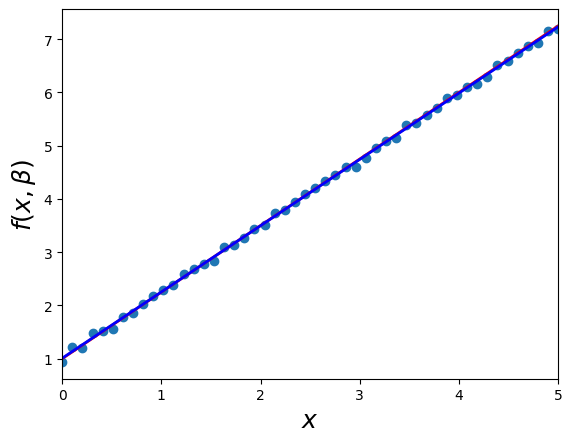

[1.58491871 5.51100832]
5.440459645048289e-05
0.12580743566616992
0.12580743566616992


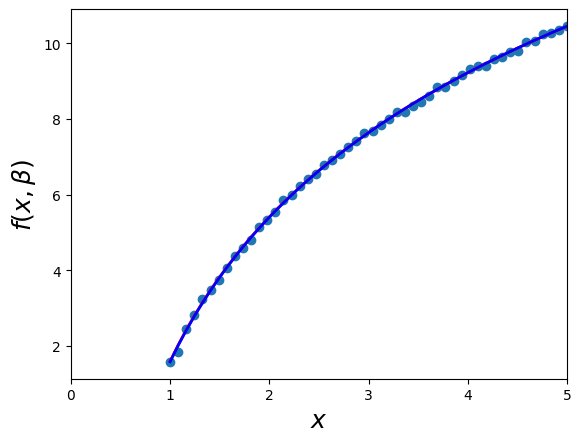

[2.50010834 4.49997043]
4.270449625641368e-08
0.1554550018352927


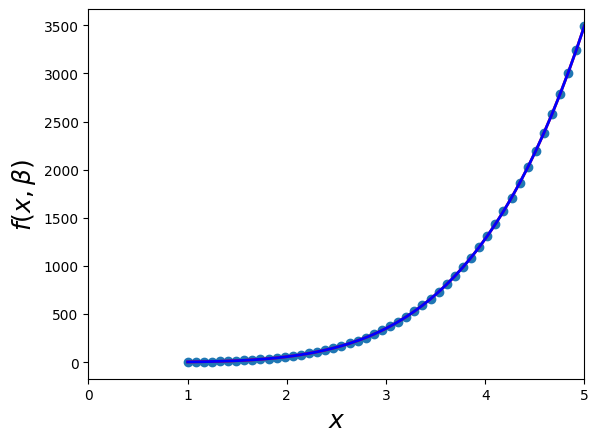

In [16]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Задание 1
beta = (1, 1.25)
def f(x: float, b0: float, b1: float) -> float:
    return b0 + b1 * x

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)

print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig,ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

# Задание 2
beta = (1.6, 5.5)
def f(x: float, b0: float, b1: float) -> float:
    return b0 + b1 * np.log(x)

xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# Задание 3
beta = (2.5, 4.5)
def f(x: float, b0: float, b1: float) -> float:
    return b0 * x ** b1

xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

**1.2.1 Пример**
Построим простую линейную регресию в Python с использованием библиотеки scikit-learn

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

my_dict = {'Учебное время': [0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 4, 4.25, 4.5, 4.75, 5, 5.5],
           'Оценка': [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]}

dataset = pd.DataFrame(my_dict)
dataset.head()
print(dataset.shape)
dataset.describe()

plt.scatter(dataset['Учебное время'], dataset['Оценка'], color = 'b', label = 'данные экзамена')
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()


ValueError: All arrays must be of the same length

После того как мы получили представление о данных, разделим информацию
на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки
– это зависимые переменные, значения которых должны быть предсказаны. В
нашем наборе всего два столбца и необходимо предсказать оценку в
зависимости от количества часов. Чтобы извлечь атрибуты и метки,
выполните следующий скрипт:

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

my_dict = {'Учебное время': [0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 4, 4.25, 4.5, 4.75, 5, 5.5],
           'Оценка': [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]}

dataset = pd.DataFrame(my_dict)
dataset.head()
print(dataset.shape)
dataset.describe()

plt.scatter(dataset['Учебное время'], dataset['Оценка'], color = 'b', label = 'данные экзамена')
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()


X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

ValueError: All arrays must be of the same length

Получившийся результат можно интерпретировать следующим образом: с
каждым затраченным часом на обучение результат экзамена повышается
приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы
будем использовать наши тестовые данные и посмотрим, насколько точно наш
алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на
тестовых данных необходимо выполнить следующий код:

In [20]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5',color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5',color='black')
plt.show()

plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

NameError: name 'regressor' is not defined

**1.2.2 Задание**
Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


dataset = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv')


X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)


slope = regressor.coef_[0]
intercept = regressor.intercept_

print(f"Наклон (slope): {slope:.2f}")
print(f"Y-сдвиг (intercept): {intercept:.2f}")


plt.scatter(X_test, y_test, color='blue', label='Фактические значения')
plt.plot(X_test, y_pred, color='red', label='Линия регрессии')
plt.title('Заработная плата vs Опыт работы')
plt.xlabel('Опыт работы (лет)')
plt.ylabel('Заработная плата ($)')
plt.legend()
plt.show()


HTTPError: HTTP Error 404: Not Found